<a href="https://colab.research.google.com/github/bikash-bhoi/eva4/blob/master/Session10/Session_10_CIFAR_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir temp

In [2]:
%%bash
git clone https://github.com/bikash-bhoi/eva4.git temp
if [ ! -d ./models ]; then
    mkdir models
fi
if [ ! -d ./utils ]; then
    mkdir utils
fi
cp -r temp/models/* ./models
cp -r temp/utils/* ./utils
rm -rf temp

Cloning into 'temp'...


In [3]:
!pip install pytorch-gradcam
!pip install albumentations

     |████████████████████████████████| 6.0MB 5.8MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp36-none-any.whl size=5269 sha256=876c0096f12a75220828bb3b006dcd5996e106c849432520801eaac66883d830
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam
     |████████████████████████████████| 634kB 7.5MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=b0154f541a3be22360302be98b5acab5c84484a24bf41430ddd44237eaa07c86
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [0]:
from utils.download_load import download_load
from utils.display_imgs import display_imgs
from utils.train_test import train , test
from utils.disp_summary import disp_summary
from utils.gradcam import grad_cam
from models.resnet import ResNet18

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary
import torch

In [6]:
trainset, testset, train_loader, test_loader, classes =download_load()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

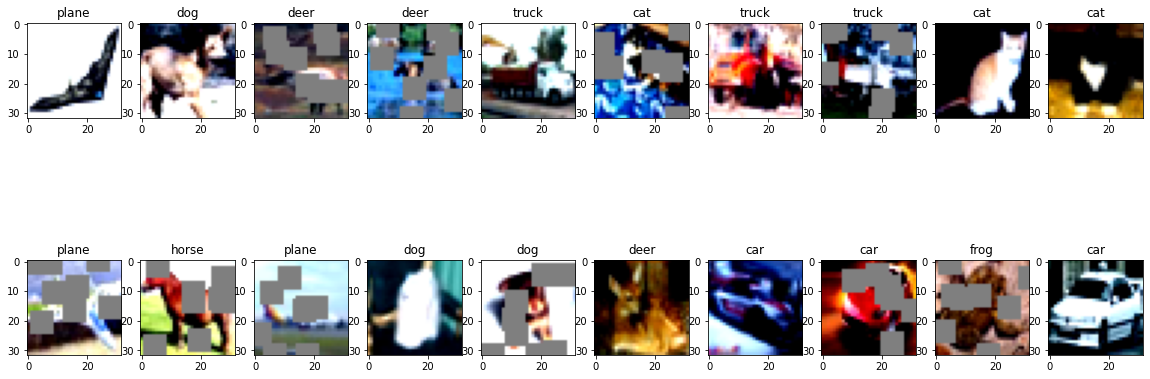

In [7]:
display_imgs(train_loader, classes)

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [10]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
         Dropout2d-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
         Dropout2d-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
       BasicBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [12]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01,  momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=1e-06, eps=1e-06)

for epoch in range(1, 51):
    curr_lr=optimizer.param_groups[0]['lr']
    print(f'Epoch: {epoch} Learning_Rate {curr_lr}')
    train(model, device, train_loader, optimizer, epoch)
    test_acc1 = test(model, device, test_loader)
    print('Test acc:', test_acc1)
    scheduler.step(test_acc1)


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.01


/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.784151315689087 Batch_id=781 Accuracy=31.09: 100%|██████████| 782/782 [01:46<00:00,  7.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4842, Accuracy: 4399/10000 (43.99%)

Test acc: 43.99
Epoch: 2 Learning_Rate 0.01


Loss=1.294792890548706 Batch_id=781 Accuracy=41.76: 100%|██████████| 782/782 [01:46<00:00,  7.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2729, Accuracy: 5298/10000 (52.98%)

Test acc: 52.98
Epoch: 3 Learning_Rate 0.01


Loss=1.4029197692871094 Batch_id=781 Accuracy=48.02: 100%|██████████| 782/782 [01:48<00:00,  7.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1461, Accuracy: 5792/10000 (57.92%)

Test acc: 57.92
Epoch: 4 Learning_Rate 0.01


Loss=1.325864553451538 Batch_id=781 Accuracy=52.57: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0688, Accuracy: 6128/10000 (61.28%)

Test acc: 61.28
Epoch: 5 Learning_Rate 0.01


Loss=1.207627296447754 Batch_id=781 Accuracy=56.54: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9692, Accuracy: 6516/10000 (65.16%)

Test acc: 65.16
Epoch: 6 Learning_Rate 0.01


Loss=1.0238721370697021 Batch_id=781 Accuracy=60.19: 100%|██████████| 782/782 [01:47<00:00,  7.24it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8460, Accuracy: 6993/10000 (69.93%)

Test acc: 69.93
Epoch: 7 Learning_Rate 0.01


Loss=1.4604039192199707 Batch_id=781 Accuracy=63.19: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7908, Accuracy: 7215/10000 (72.15%)

Test acc: 72.15
Epoch: 8 Learning_Rate 0.01


Loss=1.634240746498108 Batch_id=781 Accuracy=65.00: 100%|██████████| 782/782 [01:46<00:00,  7.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7511, Accuracy: 7416/10000 (74.16%)

Test acc: 74.16
Epoch: 9 Learning_Rate 0.01


Loss=1.352928876876831 Batch_id=781 Accuracy=67.37: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6691, Accuracy: 7657/10000 (76.57%)

Test acc: 76.57
Epoch: 10 Learning_Rate 0.01


Loss=0.4222545027732849 Batch_id=781 Accuracy=69.08: 100%|██████████| 782/782 [01:48<00:00,  7.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6349, Accuracy: 7775/10000 (77.75%)

Test acc: 77.75
Epoch: 11 Learning_Rate 0.01


Loss=1.1589081287384033 Batch_id=781 Accuracy=70.35: 100%|██████████| 782/782 [01:48<00:00,  7.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6072, Accuracy: 7895/10000 (78.95%)

Test acc: 78.95
Epoch: 12 Learning_Rate 0.01


Loss=1.2051010131835938 Batch_id=781 Accuracy=71.40: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5977, Accuracy: 7967/10000 (79.67%)

Test acc: 79.67
Epoch: 13 Learning_Rate 0.01


Loss=0.7046972513198853 Batch_id=781 Accuracy=72.79: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5594, Accuracy: 8098/10000 (80.98%)

Test acc: 80.98
Epoch: 14 Learning_Rate 0.01


Loss=0.5932832360267639 Batch_id=781 Accuracy=73.54: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5723, Accuracy: 8052/10000 (80.52%)

Test acc: 80.52
Epoch: 15 Learning_Rate 0.01


Loss=0.43905726075172424 Batch_id=781 Accuracy=74.62: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5202, Accuracy: 8199/10000 (81.99%)

Test acc: 81.99
Epoch: 16 Learning_Rate 0.01


Loss=0.8098621368408203 Batch_id=781 Accuracy=75.64: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5130, Accuracy: 8237/10000 (82.37%)

Test acc: 82.37
Epoch: 17 Learning_Rate 0.01


Loss=0.9692582488059998 Batch_id=781 Accuracy=76.22: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5038, Accuracy: 8285/10000 (82.85%)

Test acc: 82.85
Epoch: 18 Learning_Rate 0.01


Loss=0.7627167701721191 Batch_id=781 Accuracy=76.62: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4846, Accuracy: 8396/10000 (83.96%)

Test acc: 83.96
Epoch: 19 Learning_Rate 0.01


Loss=0.6856894493103027 Batch_id=781 Accuracy=77.50: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5301, Accuracy: 8251/10000 (82.51%)

Test acc: 82.51
Epoch: 20 Learning_Rate 0.01


Loss=0.9025527238845825 Batch_id=781 Accuracy=78.03: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4752, Accuracy: 8402/10000 (84.02%)

Test acc: 84.02
Epoch: 21 Learning_Rate 0.01


Loss=0.39434951543807983 Batch_id=781 Accuracy=78.57: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4532, Accuracy: 8467/10000 (84.67%)

Test acc: 84.67
Epoch: 22 Learning_Rate 0.01


Loss=0.9546951055526733 Batch_id=781 Accuracy=79.31: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4597, Accuracy: 8508/10000 (85.08%)

Test acc: 85.08
Epoch: 23 Learning_Rate 0.01


Loss=0.7339404821395874 Batch_id=781 Accuracy=79.64: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4429, Accuracy: 8525/10000 (85.25%)

Test acc: 85.25
Epoch: 24 Learning_Rate 0.01


Loss=1.13953697681427 Batch_id=781 Accuracy=80.10: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4320, Accuracy: 8546/10000 (85.46%)

Test acc: 85.46
Epoch: 25 Learning_Rate 0.01


Loss=0.7373310327529907 Batch_id=781 Accuracy=80.73: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4245, Accuracy: 8547/10000 (85.47%)

Test acc: 85.47
Epoch: 26 Learning_Rate 0.01


Loss=0.41652584075927734 Batch_id=781 Accuracy=80.72: 100%|██████████| 782/782 [01:46<00:00,  7.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4113, Accuracy: 8600/10000 (86.00%)

Test acc: 86.0
Epoch: 27 Learning_Rate 0.01


Loss=0.3032228946685791 Batch_id=781 Accuracy=81.24: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4036, Accuracy: 8636/10000 (86.36%)

Test acc: 86.36
Epoch: 28 Learning_Rate 0.01


Loss=0.7666705846786499 Batch_id=781 Accuracy=81.87: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4068, Accuracy: 8655/10000 (86.55%)

Test acc: 86.55
Epoch: 29 Learning_Rate 0.01


Loss=0.6468870043754578 Batch_id=781 Accuracy=81.96: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3932, Accuracy: 8697/10000 (86.97%)

Test acc: 86.97
Epoch: 30 Learning_Rate 0.01


Loss=0.16464684903621674 Batch_id=781 Accuracy=82.79: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3841, Accuracy: 8710/10000 (87.10%)

Test acc: 87.1
Epoch: 31 Learning_Rate 0.01


Loss=1.199068307876587 Batch_id=781 Accuracy=82.85: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3928, Accuracy: 8735/10000 (87.35%)

Test acc: 87.35
Epoch: 32 Learning_Rate 0.01


Loss=0.2801673412322998 Batch_id=781 Accuracy=83.29: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3757, Accuracy: 8745/10000 (87.45%)

Test acc: 87.45
Epoch: 33 Learning_Rate 0.01


Loss=0.2926945686340332 Batch_id=781 Accuracy=83.51: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3782, Accuracy: 8700/10000 (87.00%)

Test acc: 87.0
Epoch: 34 Learning_Rate 0.01


Loss=0.09796798229217529 Batch_id=781 Accuracy=83.99: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3916, Accuracy: 8716/10000 (87.16%)

Test acc: 87.16
Epoch: 35 Learning_Rate 0.01


Loss=0.4694492816925049 Batch_id=781 Accuracy=84.07: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3736, Accuracy: 8782/10000 (87.82%)

Test acc: 87.82
Epoch: 36 Learning_Rate 0.01


Loss=0.6298143863677979 Batch_id=781 Accuracy=84.46: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3917, Accuracy: 8753/10000 (87.53%)

Test acc: 87.53
Epoch: 37 Learning_Rate 0.01


Loss=0.7609556317329407 Batch_id=781 Accuracy=84.50: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3619, Accuracy: 8811/10000 (88.11%)

Test acc: 88.11
Epoch: 38 Learning_Rate 0.01


Loss=0.4298931658267975 Batch_id=781 Accuracy=85.22: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3659, Accuracy: 8799/10000 (87.99%)

Test acc: 87.99
Epoch: 39 Learning_Rate 0.01


Loss=0.32282212376594543 Batch_id=781 Accuracy=85.23: 100%|██████████| 782/782 [01:47<00:00,  7.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3694, Accuracy: 8820/10000 (88.20%)

Test acc: 88.2
Epoch: 40 Learning_Rate 0.01


Loss=0.21661634743213654 Batch_id=781 Accuracy=85.54: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3517, Accuracy: 8859/10000 (88.59%)

Test acc: 88.59
Epoch: 41 Learning_Rate 0.01


Loss=0.2782166600227356 Batch_id=781 Accuracy=85.90: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3530, Accuracy: 8876/10000 (88.76%)

Test acc: 88.76
Epoch: 42 Learning_Rate 0.01


Loss=0.5800182819366455 Batch_id=781 Accuracy=86.22: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3470, Accuracy: 8843/10000 (88.43%)

Test acc: 88.43
Epoch: 43 Learning_Rate 0.01


Loss=0.354414165019989 Batch_id=781 Accuracy=86.08: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3385, Accuracy: 8913/10000 (89.13%)

Test acc: 89.13
Epoch: 44 Learning_Rate 0.01


Loss=0.3789607584476471 Batch_id=781 Accuracy=86.57: 100%|██████████| 782/782 [01:47<00:00,  7.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3656, Accuracy: 8840/10000 (88.40%)

Test acc: 88.4
Epoch: 45 Learning_Rate 0.01


Loss=0.3419886529445648 Batch_id=781 Accuracy=86.74: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3648, Accuracy: 8828/10000 (88.28%)

Test acc: 88.28
Epoch: 46 Learning_Rate 0.01


Loss=0.8367878794670105 Batch_id=781 Accuracy=87.08: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3451, Accuracy: 8878/10000 (88.78%)

Test acc: 88.78
Epoch    46: reducing learning rate of group 0 to 5.0000e-03.
Epoch: 47 Learning_Rate 0.005


Loss=0.45651453733444214 Batch_id=781 Accuracy=87.98: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3289, Accuracy: 8950/10000 (89.50%)

Test acc: 89.5
Epoch: 48 Learning_Rate 0.005


Loss=0.3075408935546875 Batch_id=781 Accuracy=88.66: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3323, Accuracy: 8954/10000 (89.54%)

Test acc: 89.54
Epoch: 49 Learning_Rate 0.005


Loss=0.46542954444885254 Batch_id=781 Accuracy=88.93: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.3256, Accuracy: 8998/10000 (89.98%)

Test acc: 89.98
Epoch: 50 Learning_Rate 0.005


Loss=0.13232988119125366 Batch_id=781 Accuracy=89.01: 100%|██████████| 782/782 [01:46<00:00,  7.32it/s]



Test set: Average loss: 0.3346, Accuracy: 8998/10000 (89.98%)

Test acc: 89.98


In [15]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment10_ResNet18V2_model.h5'
!touch PATH
torch.save(model.state_dict(), PATH)

Mounted at /content/gdrive


In [16]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
device= 'cuda' if torch.cuda.is_available() else 'cpu'
model = ResNet18().to(device)
PATH = '/content/gdrive/My Drive/Colab Notebooks/eva4_s9/assignment10_ResNet18V2_model.h5'
model.load_state_dict(torch.load(PATH))

Mounted at /content/gdrive


<All keys matched successfully>

/content/models/resnet.py:96: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


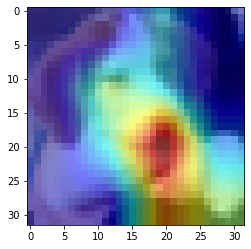

In [0]:

from utils.gradcam import grad_cam
img=testset.data[16]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)
